In [ ]:
import os
os.chdir("D:\ml")

In [ ]:
import requests
from bs4 import BeautifulSoup
import csv

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

## Парсинг

In [ ]:
air_names = [['Аврора', "https://www.airlines-inform.ru/about_airline/aurora/", 4],
         ['Азимут', "https://www.airlines-inform.ru/about_airline/azimuth/", 24],
         ['Азур Эйр', "https://www.airlines-inform.ru/about_airline/azurair/", 84],
         ['Ай Флай', "https://www.airlines-inform.ru/about_airline/i-fly/", 23],
         ['Алроса', "https://www.airlines-inform.ru/about_airline/mirniy_air_enterprise/", 10],
         ['Ангара', "https://www.airlines-inform.ru/about_airline/angara_airlines/", 2],
         ['Аэрофлот', "https://www.airlines-inform.ru/about_airline/aeroflot/", 91],
         ['Вологодское авиационное предприятие', "https://www.airlines-inform.ru/about_airline/vologda_air_enterprise/", 2],
         ['Газпромавиа', "https://www.airlines-inform.ru/about_airline/gazpromavia_aviation/", 2],
         ['Ижавиа', "https://www.airlines-inform.ru/about_airline/izhavia/", 4],
         ['Икар', "https://www.airlines-inform.ru/about_airline/ikar/", 14],
         ['ИрАэро', "https://www.airlines-inform.ru/about_airline/iraero/", 13],
         ['Казанское авиапредприятие', "https://www.airlines-inform.ru/about_airline/kazan_air_enterprise/", 2],
         ['Камчатское авиапредприятие', "https://www.airlines-inform.ru/about_airline/petropavlovskkamchatski_airline/", 2],
         ['Комиавиатранс', "https://www.airlines-inform.ru/about_airline/komiaviatrans/", 2],
         ['Космос', "https://www.airlines-inform.ru/about_airline/kosmos_air_enterprise/", 2],
         ['Костромское авиапредприятие', "https://www.airlines-inform.ru/about_airline/kostroma_air_enterprise/", 2],
         ['КрасАвиа', "https://www.airlines-inform.ru/about_airline/krasavia/", 2],
         ['Меридиан', "https://www.airlines-inform.ru/about_airline/meridian/", 2],
         ['НордСтар', "https://www.airlines-inform.ru/about_airline/nordstar/", 17],
         ['Оренбуржье', "https://www.airlines-inform.ru/about_airline/orenburzhye/", 2],
         ['ПАНХ', "https://www.airlines-inform.ru/about_airline/panh/", 2],
         ['Победа', "https://www.airlines-inform.ru/about_airline/pobeda/", 151],
         ['Полярные авиалинии', "https://www.airlines-inform.ru/about_airline/polar_airlines/", 2],
         ['Ред Вингс', "https://www.airlines-inform.ru/about_airline/red_wings/", 57],
         ['Россия', "https://www.airlines-inform.ru/about_airline/rossiya_airlines/", 55],
         ['Роял Флайт',"https://www.airlines-inform.ru/about_airline/royal_flight/", 37],
         ['РусДжет', "https://www.airlines-inform.ru/about_airline/rusjet/", 2],
         ['РусЛайн',"https://www.airlines-inform.ru/about_airline/rusline/", 18],
         ['Северный ветер', "https://www.airlines-inform.ru/about_airline/nordwind_airlines/", 111],
         ['Северсталь', "https://www.airlines-inform.ru/about_airline/severstal_airlines/", 2],
         ['Сибирь', "https://www.airlines-inform.ru/about_airline/s7_airlines/", 96],
         ['СиЛА', "https://airport.airlines-inform.ru/airport-reviews/sila/", 2],
         ['Сириус-Аэро', "https://www.airlines-inform.ru/about_airline/siriusaero/", 2],
         ['СКОЛ', "https://www.airlines-inform.ru/about_airline/skol/", 2],
         ['Тулпар Эйр', "https://www.airlines-inform.ru/about_airline/tulpar_air/", 2],
         ['Уральские авиалинии', "https://www.airlines-inform.ru/about_airline/ural_airlines/", 150],
         ['Хабаровские авиалинии', "https://www.airlines-inform.ru/about_airline/khabarovsk_airlines/", 2],
         ['Чукотавиа', "https://www.airlines-inform.ru/about_airline/chukotavia/", 2],
         ['ЮВТ-Аэро', "https://www.airlines-inform.ru/about_airline/uvt-aero/", 3],
         ['Ютэйр', "https://www.airlines-inform.ru/about_airline/utair/", 66],
         ['Якутия', "https://www.airlines-inform.ru/about_airline/yakutia_airlines/", 19],
         ['Ямал', "https://www.airlines-inform.ru/about_airline/yamal_airlines/", 19]]  

In [ ]:
def get_info(html, qqq):
    soup = BeautifulSoup(html, 'html.parser')
    reviews = soup.find("div", {"id": "ajaxBody"})
    k=[]
    for i in reviews.find_all("div", {"class": "message_forum posrel"}):
        try:
            rev_text = i.find("p").text
        except:
            rev_text = ''
        try:
            if i.find("div", {"class": "forum_data negativ"}) != None: rate = "negativ"
            elif i.find("div", {"class": "forum_data positiv"}) != None: rate = "positiv"
            elif i.find("div", {"class": "forum_data neutral"}) != None: rate = "neutral"
        except:
            rate = ''
        try:
            date = i.find("div", {"class": "forum_data "+rate}).find("span").text.replace('\n', '')
        except:
            date = ''

        name = qqq
        data = {
          'name' : name,
          'date' : date,
          'rev_text': rev_text,
          'rate': rate
            }
        k.append(data)
    return(k)

In [ ]:
def parse_main(names): 
    for airc in names:
        base_url = airc[1]
        page_part = ".html"
        with open('reviews_v_kr.csv', 'a', encoding="utf-8") as csvfile:
            for i in range(1,airc[2]):
                url = base_url  + str(i) + page_part
                response = requests.get(url)
                html = response.text
                t = get_info(html, airc[0])
                print(i, url)
                spamwriter = csv.writer(csvfile)
                for i in t:
                try:
                    r = i['name']
                except:
                    r = ''
                spamwriter.writerow([r,
                         i['date'],
                         i['rev_text'],
                         i['rate']])
    
parse_main(air_names)

1 https://www.airlines-inform.ru/about_airline/aurora/1.html
2 https://www.airlines-inform.ru/about_airline/aurora/2.html
3 https://www.airlines-inform.ru/about_airline/aurora/3.html
1 https://www.airlines-inform.ru/about_airline/azimuth/1.html
2 https://www.airlines-inform.ru/about_airline/azimuth/2.html
3 https://www.airlines-inform.ru/about_airline/azimuth/3.html
4 https://www.airlines-inform.ru/about_airline/azimuth/4.html
5 https://www.airlines-inform.ru/about_airline/azimuth/5.html
6 https://www.airlines-inform.ru/about_airline/azimuth/6.html
7 https://www.airlines-inform.ru/about_airline/azimuth/7.html
8 https://www.airlines-inform.ru/about_airline/azimuth/8.html
9 https://www.airlines-inform.ru/about_airline/azimuth/9.html
10 https://www.airlines-inform.ru/about_airline/azimuth/10.html
11 https://www.airlines-inform.ru/about_airline/azimuth/11.html
12 https://www.airlines-inform.ru/about_airline/azimuth/12.html
13 https://www.airlines-inform.ru/about_airline/azimuth/13.html
14 

22 https://www.airlines-inform.ru/about_airline/i-fly/22.html
1 https://www.airlines-inform.ru/about_airline/mirniy_air_enterprise/1.html
2 https://www.airlines-inform.ru/about_airline/mirniy_air_enterprise/2.html
3 https://www.airlines-inform.ru/about_airline/mirniy_air_enterprise/3.html
4 https://www.airlines-inform.ru/about_airline/mirniy_air_enterprise/4.html
5 https://www.airlines-inform.ru/about_airline/mirniy_air_enterprise/5.html
6 https://www.airlines-inform.ru/about_airline/mirniy_air_enterprise/6.html
7 https://www.airlines-inform.ru/about_airline/mirniy_air_enterprise/7.html
8 https://www.airlines-inform.ru/about_airline/mirniy_air_enterprise/8.html
9 https://www.airlines-inform.ru/about_airline/mirniy_air_enterprise/9.html
1 https://www.airlines-inform.ru/about_airline/angara_airlines/1.html
1 https://www.airlines-inform.ru/about_airline/aeroflot/1.html
2 https://www.airlines-inform.ru/about_airline/aeroflot/2.html
3 https://www.airlines-inform.ru/about_airline/aeroflot/3.

9 https://www.airlines-inform.ru/about_airline/iraero/9.html
10 https://www.airlines-inform.ru/about_airline/iraero/10.html
11 https://www.airlines-inform.ru/about_airline/iraero/11.html
12 https://www.airlines-inform.ru/about_airline/iraero/12.html
1 https://www.airlines-inform.ru/about_airline/kazan_air_enterprise/1.html
1 https://www.airlines-inform.ru/about_airline/petropavlovskkamchatski_airline/1.html
1 https://www.airlines-inform.ru/about_airline/komiaviatrans/1.html
1 https://www.airlines-inform.ru/about_airline/kosmos_air_enterprise/1.html
1 https://www.airlines-inform.ru/about_airline/kostroma_air_enterprise/1.html
1 https://www.airlines-inform.ru/about_airline/krasavia/1.html
1 https://www.airlines-inform.ru/about_airline/meridian/1.html
1 https://www.airlines-inform.ru/about_airline/nordstar/1.html
2 https://www.airlines-inform.ru/about_airline/nordstar/2.html
3 https://www.airlines-inform.ru/about_airline/nordstar/3.html
4 https://www.airlines-inform.ru/about_airline/nords

102 https://www.airlines-inform.ru/about_airline/pobeda/102.html
103 https://www.airlines-inform.ru/about_airline/pobeda/103.html
104 https://www.airlines-inform.ru/about_airline/pobeda/104.html
105 https://www.airlines-inform.ru/about_airline/pobeda/105.html
106 https://www.airlines-inform.ru/about_airline/pobeda/106.html
107 https://www.airlines-inform.ru/about_airline/pobeda/107.html
108 https://www.airlines-inform.ru/about_airline/pobeda/108.html
109 https://www.airlines-inform.ru/about_airline/pobeda/109.html
110 https://www.airlines-inform.ru/about_airline/pobeda/110.html
111 https://www.airlines-inform.ru/about_airline/pobeda/111.html
112 https://www.airlines-inform.ru/about_airline/pobeda/112.html
113 https://www.airlines-inform.ru/about_airline/pobeda/113.html
114 https://www.airlines-inform.ru/about_airline/pobeda/114.html
115 https://www.airlines-inform.ru/about_airline/pobeda/115.html
116 https://www.airlines-inform.ru/about_airline/pobeda/116.html
117 https://www.airlines-

19 https://www.airlines-inform.ru/about_airline/rossiya_airlines/19.html
20 https://www.airlines-inform.ru/about_airline/rossiya_airlines/20.html
21 https://www.airlines-inform.ru/about_airline/rossiya_airlines/21.html
22 https://www.airlines-inform.ru/about_airline/rossiya_airlines/22.html
23 https://www.airlines-inform.ru/about_airline/rossiya_airlines/23.html
24 https://www.airlines-inform.ru/about_airline/rossiya_airlines/24.html
25 https://www.airlines-inform.ru/about_airline/rossiya_airlines/25.html
26 https://www.airlines-inform.ru/about_airline/rossiya_airlines/26.html
27 https://www.airlines-inform.ru/about_airline/rossiya_airlines/27.html
28 https://www.airlines-inform.ru/about_airline/rossiya_airlines/28.html
29 https://www.airlines-inform.ru/about_airline/rossiya_airlines/29.html
30 https://www.airlines-inform.ru/about_airline/rossiya_airlines/30.html
31 https://www.airlines-inform.ru/about_airline/rossiya_airlines/31.html
32 https://www.airlines-inform.ru/about_airline/ros

28 https://www.airlines-inform.ru/about_airline/nordwind_airlines/28.html
29 https://www.airlines-inform.ru/about_airline/nordwind_airlines/29.html
30 https://www.airlines-inform.ru/about_airline/nordwind_airlines/30.html
31 https://www.airlines-inform.ru/about_airline/nordwind_airlines/31.html
32 https://www.airlines-inform.ru/about_airline/nordwind_airlines/32.html
33 https://www.airlines-inform.ru/about_airline/nordwind_airlines/33.html
34 https://www.airlines-inform.ru/about_airline/nordwind_airlines/34.html
35 https://www.airlines-inform.ru/about_airline/nordwind_airlines/35.html
36 https://www.airlines-inform.ru/about_airline/nordwind_airlines/36.html
37 https://www.airlines-inform.ru/about_airline/nordwind_airlines/37.html
38 https://www.airlines-inform.ru/about_airline/nordwind_airlines/38.html
39 https://www.airlines-inform.ru/about_airline/nordwind_airlines/39.html
40 https://www.airlines-inform.ru/about_airline/nordwind_airlines/40.html
41 https://www.airlines-inform.ru/abou

31 https://www.airlines-inform.ru/about_airline/s7_airlines/31.html
32 https://www.airlines-inform.ru/about_airline/s7_airlines/32.html
33 https://www.airlines-inform.ru/about_airline/s7_airlines/33.html
34 https://www.airlines-inform.ru/about_airline/s7_airlines/34.html
35 https://www.airlines-inform.ru/about_airline/s7_airlines/35.html
36 https://www.airlines-inform.ru/about_airline/s7_airlines/36.html
37 https://www.airlines-inform.ru/about_airline/s7_airlines/37.html
38 https://www.airlines-inform.ru/about_airline/s7_airlines/38.html
39 https://www.airlines-inform.ru/about_airline/s7_airlines/39.html
40 https://www.airlines-inform.ru/about_airline/s7_airlines/40.html
41 https://www.airlines-inform.ru/about_airline/s7_airlines/41.html
42 https://www.airlines-inform.ru/about_airline/s7_airlines/42.html
43 https://www.airlines-inform.ru/about_airline/s7_airlines/43.html
44 https://www.airlines-inform.ru/about_airline/s7_airlines/44.html
45 https://www.airlines-inform.ru/about_airline/

52 https://www.airlines-inform.ru/about_airline/ural_airlines/52.html
53 https://www.airlines-inform.ru/about_airline/ural_airlines/53.html
54 https://www.airlines-inform.ru/about_airline/ural_airlines/54.html
55 https://www.airlines-inform.ru/about_airline/ural_airlines/55.html
56 https://www.airlines-inform.ru/about_airline/ural_airlines/56.html
57 https://www.airlines-inform.ru/about_airline/ural_airlines/57.html
58 https://www.airlines-inform.ru/about_airline/ural_airlines/58.html
59 https://www.airlines-inform.ru/about_airline/ural_airlines/59.html
60 https://www.airlines-inform.ru/about_airline/ural_airlines/60.html
61 https://www.airlines-inform.ru/about_airline/ural_airlines/61.html
62 https://www.airlines-inform.ru/about_airline/ural_airlines/62.html
63 https://www.airlines-inform.ru/about_airline/ural_airlines/63.html
64 https://www.airlines-inform.ru/about_airline/ural_airlines/64.html
65 https://www.airlines-inform.ru/about_airline/ural_airlines/65.html
66 https://www.airli

17 https://www.airlines-inform.ru/about_airline/utair/17.html
18 https://www.airlines-inform.ru/about_airline/utair/18.html
19 https://www.airlines-inform.ru/about_airline/utair/19.html
20 https://www.airlines-inform.ru/about_airline/utair/20.html
21 https://www.airlines-inform.ru/about_airline/utair/21.html
22 https://www.airlines-inform.ru/about_airline/utair/22.html
23 https://www.airlines-inform.ru/about_airline/utair/23.html
24 https://www.airlines-inform.ru/about_airline/utair/24.html
25 https://www.airlines-inform.ru/about_airline/utair/25.html
26 https://www.airlines-inform.ru/about_airline/utair/26.html
27 https://www.airlines-inform.ru/about_airline/utair/27.html
28 https://www.airlines-inform.ru/about_airline/utair/28.html
29 https://www.airlines-inform.ru/about_airline/utair/29.html
30 https://www.airlines-inform.ru/about_airline/utair/30.html
31 https://www.airlines-inform.ru/about_airline/utair/31.html
32 https://www.airlines-inform.ru/about_airline/utair/32.html
33 https

In [ ]:
df = pd.read_csv('reviews_v_kr.csv', encoding = 'utf-8', names = ['name', 'date', 'text', 'class'])
df

,name,date,text,class
0,Аврора,03.05.2017,Летел Авророй Владивосток Хабаровск. А 319. Са...,positiv
1,Аврора,01.05.2017,Летела с 30 апреля по 1 мая с пересадкой через...,negativ
2,Аврора,24.04.2017,Летели по маршруту магадан-хабаровск и обратно...,positiv
3,Аврора,04.04.2017,"Рейс 5640 за 04.04.2017 \rПотеряли 1 плед, 20 ...",negativ
4,Аврора,19.03.2017,Никому не советую пользоваться услугами данной...,negativ
...,...,...,...,...
53220,Ямал,13.05.2021,Никакой лояльности по отношению к клиенту. Раз...,negativ
53221,Ямал,04.05.2021,Летела 29.04.21.из Москвы в Тюмень.Хочу вырази...,positiv
53222,Ямал,03.05.2021,"Не понятно за что деньги только дерут, ничего ...",negativ
53223,Ямал,30.04.2021,"Много летал и летаю, раз 100500)..но как сегод...",positiv


## Первоначальный анализ

In [ ]:
df.isna().sum() # пустых значений нет

name     0
date     0
text     0
class    0
dtype: int64

In [ ]:
df.shape

(53225, 4)

In [ ]:
df.dtypes

name     object
date     object
text     object
class    object
dtype: object

In [ ]:
df['class'].value_counts()

negativ    27871
positiv    19914
neutral     5440
Name: class, dtype: int64

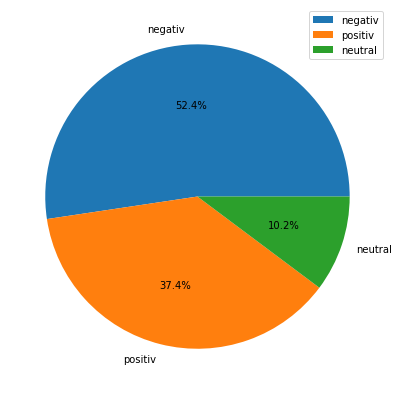

In [ ]:
counts = (df['class'].value_counts()).to_dict()
x = list(counts.values())
labels = list(counts.keys())
fig1, ax1 = plt.subplots(figsize=(7, 7))
ax1.pie(x, labels=labels, explode = (0, 0, 0), autopct='%1.1f%%')
ax1.legend(loc='best')
plt.show()

In [ ]:
n = df['class'].value_counts()[2]
class_1 = df[df['class'] == 'negativ']
class_2 = df[df['class'] == 'positiv']
class_3 = df[df['class'] == 'neutral']

class_ng = class_1.sample(n)
class_ps = class_2.sample(n)
class_nt = class_3.sample(n)

aircs_1 = pd.concat([class_ng, class_ps], axis=0)
aircs = pd.concat([aircs_1, class_nt], axis=0)

In [ ]:
class_3['text'][17]

'Рейс за 28 января по маршруту Хабаровск-Владивосток, вылет в 8-10. При проходе в самолет бортпроводники делают вид, что пассажиры это какие-то назойливые насекомые, которых необходимо рассадить и мало того еще и обслуживать, ни тебе здрасте, ни досвидание, вобще никаких эмоций. Попросил убрать их же багаж с моего места, так аж пожалел, что это предложил, лучше бы пересел на другое место. В общем лучше не иметь дела с этим лоукостером недаделанным. Самолет впорядке, к нему вопросов нет. Правда туалет был не очень свежий уже при посадке, отсутствовало мыло и бумага, ремень пристегнуть не просили, планшет выключить тоже, прошли просто для вида ворочая головой!'

In [ ]:
aircs.head()

,name,date,text,class
52257,Якутия,30.12.2021,3 сутки пытаемся улететь из Южно-Сахалинска в ...,negativ
35076,Северный ветер,03.08.2021,"Не полёт, ад с Нордвинд! Летела из Москвы, Шер...",negativ
6455,Ай Флай,08.09.2018,Просто уроды!переносят рейс i4 9163 на Анталья...,negativ
24150,Ред Вингс,29.08.2020,Самая отвратительная компания. Второй раз лета...,negativ
52885,Ямал,20.06.2018,"Всегда была довольна авиакомпанией, но сегодня...",negativ


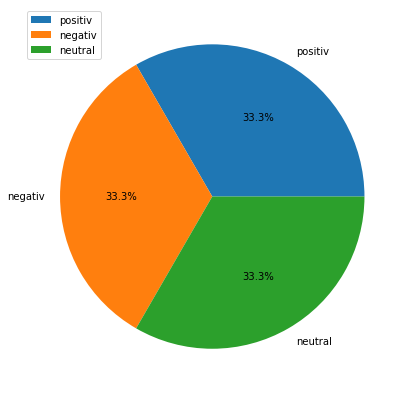

In [ ]:
counts = (aircs['class'].value_counts()).to_dict()
x = list(counts.values())
labels = list(counts.keys())
fig1, ax1 = plt.subplots(figsize=(7, 7))
ax1.pie(x, labels=labels, explode = (0, 0, 0), autopct='%1.1f%%')
ax1.legend(loc='best')
plt.show()

In [ ]:
print ('Vocabulary:') 
print (cv.vocabulary_) 

Vocabulary:
{'летел': 529, 'рейс': 1125, 'москв': 593, 'март': 552, 'вопрос': 157, 'авиакомпан': 13, 'аэропорт': 33, 'омск': 744, 'дела': 259, 'нов': 681, 'чемодан': 1492, 'самолет': 1161, 'лент': 526, 'ужас': 1420, 'лета': 528, 'июл': 442, 'челябинск': 1489, 'симферопол': 1197, 'обратн': 710, 'маршрут': 553, 'взлет': 112, 'довольн': 281, 'резк': 1123, 'раз': 1090, 'трясл': 1387, 'сторон': 1303, 'аэрофлот': 34, 'полет': 909, 'турбулентн': 1393, 'особ': 761, 'пробл': 1032, 'посадк': 954, 'сел': 1180, 'мен': 560, 'плавн': 857, 'пилот': 848, 'явн': 1525, 'ошибк': 816, 'сильн': 1196, 'крыл': 512, 'практическ': 980, 'нача': 635, 'высот': 200, 'минут': 575, 'видим': 121, 'поня': 940, 'стал': 1287, 'высок': 199, 'скорост': 1205, 'летчик': 532, 'молод': 586, 'видел': 120, 'кабин': 444, 'старш': 1295, 'лет': 527, 'отдельн': 775, 'разговор': 1093, 'бортпроводниц': 68, 'больш': 62, 'хам': 1461, 'встреча': 174, 'ког': 467, 'хот': 1471, 'ног': 685, 'проход': 1064, 'всем': 170, 'добр': 277, 'жела': 